# Breast Cancer subtype prediction based on CNA 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###   get the patient id and corresponding cancer type 

In [3]:
df_cancer_type = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/Cancer_Type_Detailed.txt')
df_cancer_type.loc[:,'Cancer Type Detailed'].value_counts()

Breast Invasive Ductal Carcinoma             1865
Breast Mixed Ductal and Lobular Carcinoma     269
Breast Invasive Lobular Carcinoma             192
Invasive Breast Carcinoma                     133
Breast Invasive Mixed Mucinous Carcinoma       25
Breast                                         21
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: Cancer Type Detailed, dtype: int64

### assgin numerical value for cancer types for classification (from most common to least)
0: Breast Invasive Ductal Carcinoma \
1: Breast Mixed Ductal and Lobular Carcinoma\
2: Breast Invasive Lobular Carcinoma\
3: Invasive Breast Carcinoma\
4: Breast Invasive Mixed Mucinous Carcinoma\
5: Breast\
6: Breast Angiosarcoma\
7: Metaplastic Breast Cancer 

In [4]:
df_cancer_type['Cancer'] = df_cancer_type['Cancer Type Detailed']
df_cancer_type['Cancer'] = df_cancer_type['Cancer'].map({'Breast Invasive Ductal Carcinoma':0, 
                                                         'Breast Mixed Ductal and Lobular Carcinoma':1,
                                                         'Breast Invasive Lobular Carcinoma':2,
                                                         'Invasive Breast Carcinoma':3,
                                                         'Breast Invasive Mixed Mucinous Carcinoma':4,
                                                         'Breast':5,
                                                         'Breast Angiosarcoma':6,
                                                         'Metaplastic Breast Cancer':7})
df_cancer_type

,Study ID,Patient ID,Sample ID,Cancer Type Detailed,Cancer
0,brca_metabric,MB-0000,MB-0000,Breast Invasive Ductal Carcinoma,0
1,brca_metabric,MB-0002,MB-0002,Breast Invasive Ductal Carcinoma,0
2,brca_metabric,MB-0005,MB-0005,Breast Invasive Ductal Carcinoma,0
3,brca_metabric,MB-0006,MB-0006,Breast Mixed Ductal and Lobular Carcinoma,1
4,brca_metabric,MB-0008,MB-0008,Breast Mixed Ductal and Lobular Carcinoma,1
...,...,...,...,...,...
2504,brca_metabric,MTS-T2428,MTS-T2428,Invasive Breast Carcinoma,3
2505,brca_metabric,MTS-T2429,MTS-T2429,Invasive Breast Carcinoma,3
2506,brca_metabric,MTS-T2430,MTS-T2430,Invasive Breast Carcinoma,3
2507,brca_metabric,MTS-T2431,MTS-T2431,Invasive Breast Carcinoma,3


### get CNA data

In [5]:
df_cna = pd.read_table('/Users/charlottewang/Desktop/practicum/MSK_noncore/brca_metabric/data_cna.txt')
df_cna

,Hugo_Symbol,Entrez_Gene_Id,MB-0000,MB-0039,MB-0045,MB-0046,MB-0048,MB-0050,MB-0053,MB-0062,...,MB-5467,MB-5546,MB-5585,MB-5625,MB-5648,MB-6020,MB-6213,MB-6230,MB-7148,MB-7188
0,A1BG,1.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A1BG-AS1,503538.0,0,0,-1,0,0,0,0,-1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A1CF,29974.0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,A2M,2.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A2M-AS1,144571.0,0,0,-1,-1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,ZYG11A,NaN,0,0,1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22540,ZYG11B,79699.0,0,0,-1,0,0,0,1,1,...,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
22541,ZYX,7791.0,0,-1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
22542,ZZEF1,23140.0,0,0,-2,-1,-1,-1,0,-1,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [6]:
#find cancer type with same patient id in cna data
cna_cancer_type = ['','']
for i in range(np.shape(df_cna)[1])[2:]:
    cna_cancer_type.append(df_cancer_type.loc[df_cancer_type['Sample ID'] == df_cna.columns.values[i], 'Cancer' ].iloc[0])

#add cancer type to cna data
df_cna = df_cna.transpose().assign(cancer = cna_cancer_type)
df_cna.rename(columns=df_cna.iloc[0], inplace = True)
df_cna.drop(df_cna.index[0:2], inplace = True)
df_cna.rename(columns = {'':'cancer'}, inplace = True)
#df_cna.reset_index(inplace=True)
#df_cna.rename(columns = {'index':'PATIENT_ID'}, inplace = True)
df_cna

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer
MB-0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MB-0039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
MB-0045,-1,-1,0,-1,-1,-1,-1,0,0,2,...,0,0,0,0,1,-1,0,-2,0,0
MB-0046,0,0,0,-1,-1,-1,-1,0,-1,0,...,0,-1,-1,0,0,0,0,-1,0,0
MB-0048,0,0,1,0,0,0,0,0,-1,0,...,1,0,0,0,0,0,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,2.0,0
MB-6213,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
MB-6230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0
MB-7148,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


-2 or Deep Deletion indicates a deep loss, possibly a homozygous deletion\
-1 or Shallow Deletion indicates a shallow loss, possibley a heterozygous deletion\
0 is diploid\
1 or Gain indicates a low-level gain (a few additional copies, often broad)\
2 or Amplification indicate a high-level amplification (more copies, often focal)\

<AxesSubplot:>

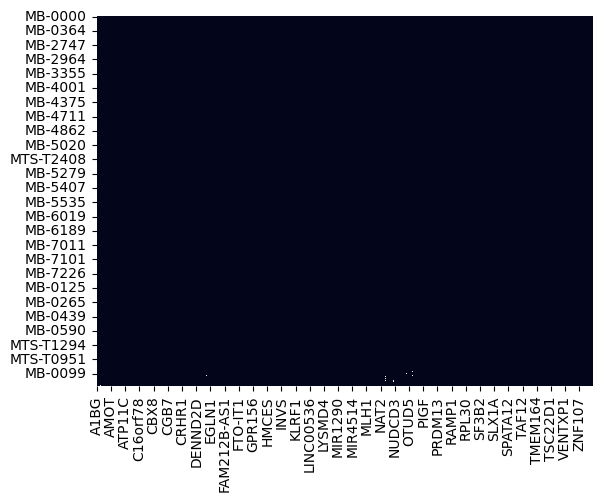

In [7]:
#check if there are any missing data 
sns.heatmap(df_cna.isnull(), cbar=False)

since the missing data is not a lot, I decide to drop the null rows instead of fill it with a value which might not be accurate. 

In [8]:
df_cna.dropna(inplace=True)

we lost the data for Breast Angiosarcoma which only has 2 samples

## Data Visualization 

In [ ]:
X,y  = df_cna.drop('cancer', axis=1), df_cna[['cancer']].values.flatten()

<AxesSubplot:>

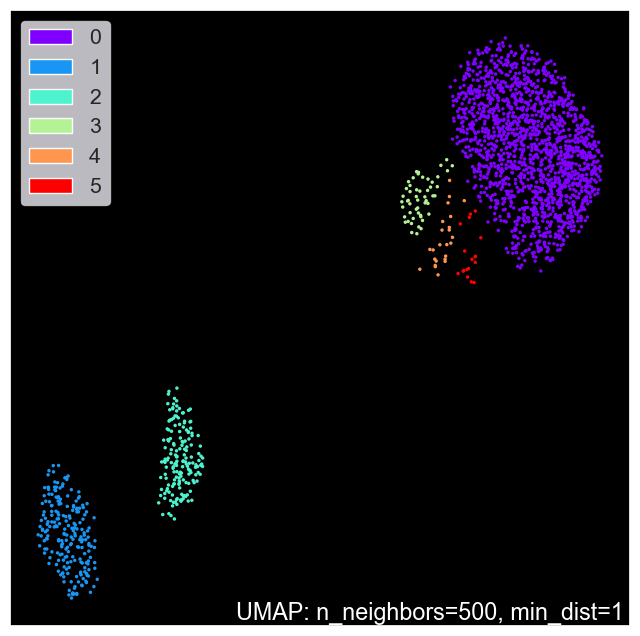

In [154]:
import umap 
import umap.plot
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline 

pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

# Encode the target to numeric
y_encoded = pd.factorize(y)[0]

manifold = umap.UMAP(n_neighbors = 500, min_dist = 1).fit(X, y_encoded)

umap.plot.points(manifold, labels=y, theme="fire")


0: Breast Invasive Ductal Carcinoma \
1: Breast Mixed Ductal and Lobular Carcinoma\
2: Breast Invasive Lobular Carcinoma\
3: Invasive Breast Carcinoma\
4: Breast Invasive Mixed Mucinous Carcinoma\
5: Breast\
7: Metaplastic Breast Cancer 

In [62]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 7], dtype=object),
 array([1615,  213,  168,   52,   24,   18,    1]))

Because there is only 1 sample for cancer 7:  Metaplastic Breast Cancerk, and this data is not clearly separable from other datapoints according to the graphs above, I drop this data from the data set. 

In [73]:
df_cna.drop(df_cna.index[df_cna['cancer'] == 7], inplace = True)
X,y  = df_cna.drop('cancer', axis=1), df_cna[['cancer']].values.flatten()
y=y.astype('int')
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1615,  213,  168,   52,   24,   18]))

### Split the data into training and testing 

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=1, stratify=y)
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1211,  160,  126,   39,   18,   13]))

## multilayer perceptrom

## deep neural network

## random forest 

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

forest = RandomForestClassifier(n_estimators=1000, class_weight='balanced').fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)
accuracy_score(y_test, y_pred_forest)

0.7609942638623327

In [117]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, forest.predict_proba(X), multi_class='ovo', average = 'macro')

0.9416924190701722

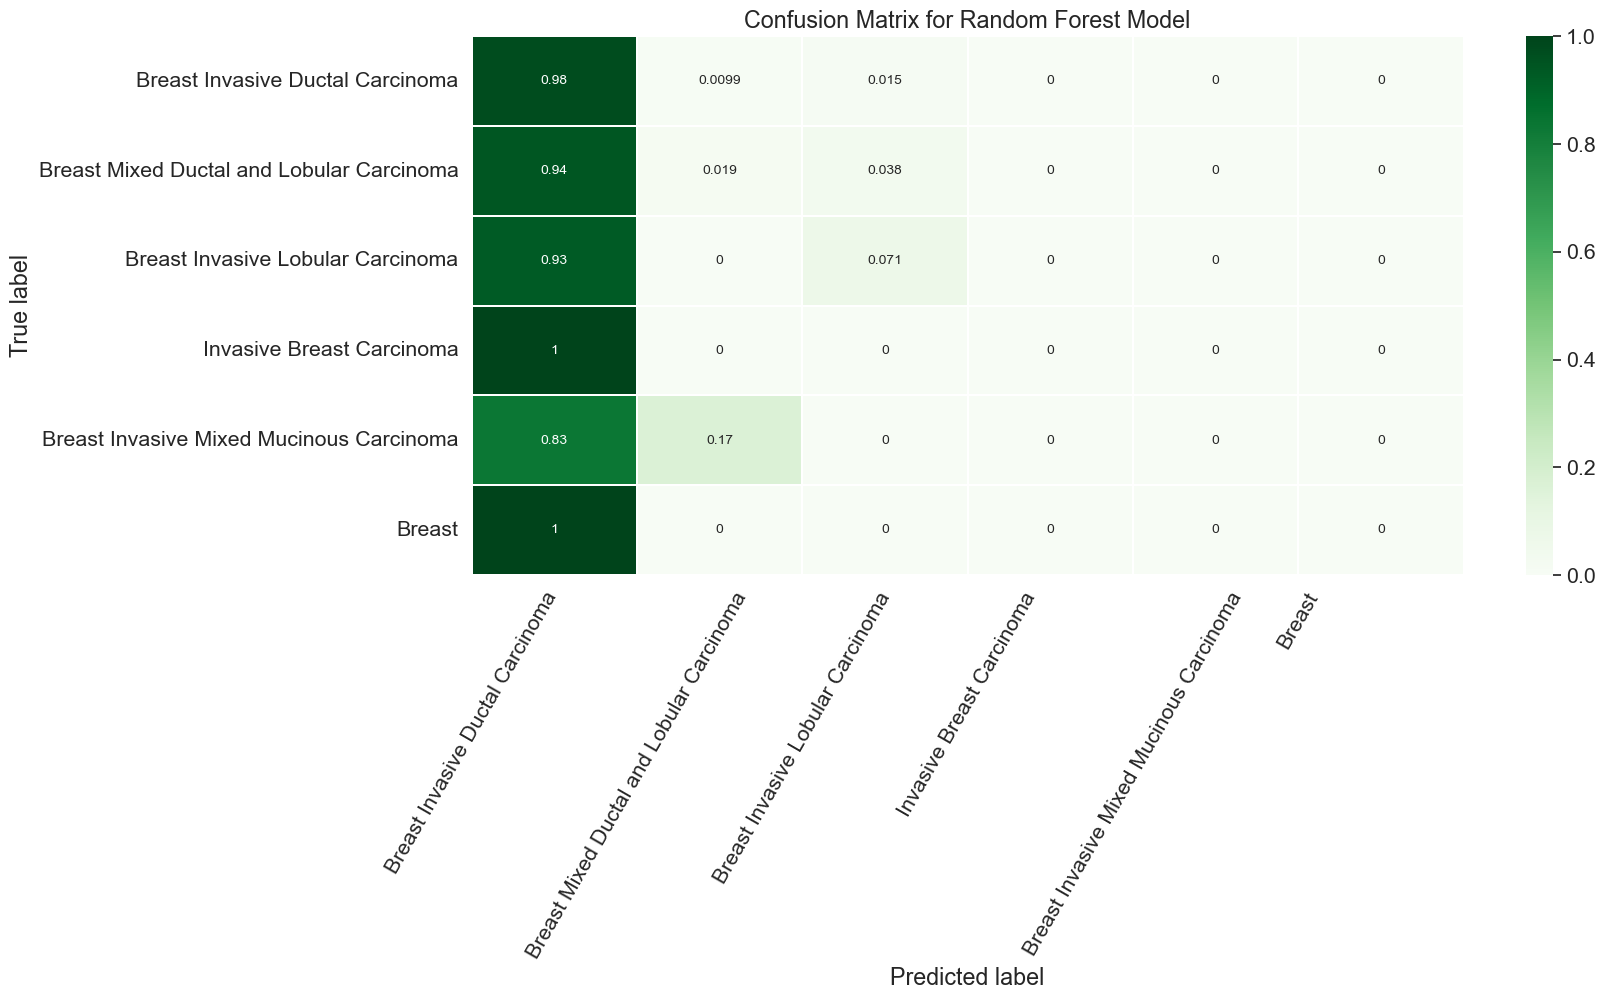

In [140]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma',
'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma',
'Breast']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [112]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       404
           1       0.20      0.02      0.03        53
           2       0.22      0.05      0.08        42
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5

    accuracy                           0.76       523
   macro avg       0.20      0.17      0.16       523
weighted avg       0.64      0.76      0.68       523



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression 

In [149]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", class_weight='balanced', max_iter = 1000).fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.6290630975143403

In [150]:
roc_auc_score(y, lr.predict_proba(X), multi_class='ovo', average = 'macro')

0.899574896191721

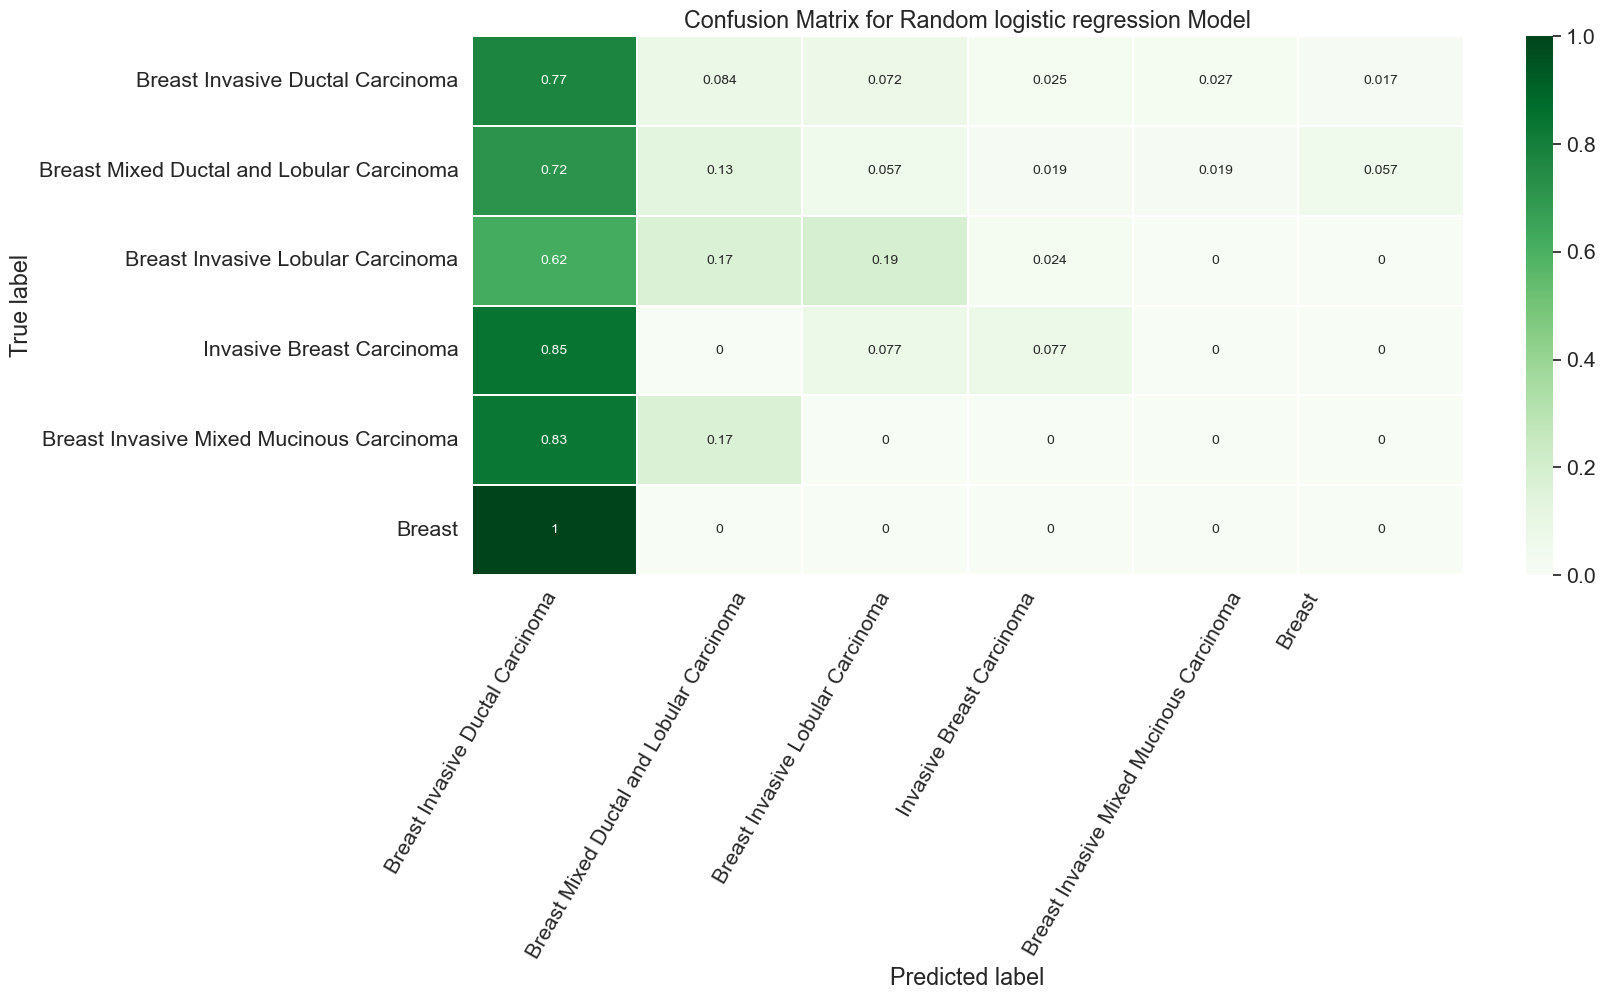

In [151]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_lr)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma',
'Breast Invasive Lobular Carcinoma', 'Invasive Breast Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma',
'Breast']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random logistic regression Model')
plt.show()

In [152]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       404
           1       0.14      0.13      0.14        53
           2       0.20      0.19      0.19        42
           3       0.08      0.08      0.08        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5

    accuracy                           0.63       523
   macro avg       0.20      0.20      0.20       523
weighted avg       0.64      0.63      0.63       523



## multiclass classificatipon 

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

mc = MultiOutputClassifier().fit(x_train, y_train)
y_pred_mc = mc.predict_proba(x_test)
y_pred = np.transpose([pred[:, 1] for pred in y_pred_mc])
roc_auc_score(y, y_pred, average=None)


In [ ]:
from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(x_train, y_train)
roc_auc_score(y, clf.decision_function(X), average=None)

## group genetic algorithm

## SVM 

## hierarchy